### (EDA + Missing Value + Outlier + ML Model) by Kundurthi Venkata Mahesh #innominions-april-21

### Importing the required Libraries

Below are the necessary libraries which are used to perform EDA(Exploratory Data Ananlysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

### Loading the data into Dataframe

<p>Loading the data into the pandas data frame, which is the first step in EDA. <br>
Read the .csv file using 'read_csv()' function from pandas library and each data is separated by the delimiter ',' in given dataset.</p>

In [23]:
df = pd.read_csv(r'C:\Users\mahesh\Downloads\adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Size of the Dataset

We can get the Total number of Observations (rows) and Features (columns) from the dataset using ".shape".

In [24]:
df.shape

(48842, 15)

### Dropping the unnecessary Columns

For simplicity of this analysis, we can discard the weighting factor or <b>fnlwgt.</b><br> Total number of years of education can be represented by the highest education level completed or <b>educational-num</b>.<br> Role in the family can be assessed from gender and marital status instead of <b>relationship</b>.<br><br> Thus, we are going to delelte the 3 variables <b>education, relationship,</b> and <b>fnlwgt.</b>

In [25]:
df.drop(['fnlwgt','education','relationship'], axis=1, inplace=True)
print(df.shape)
df.dtypes

(48842, 12)


age                 int64
workclass          object
educational-num     int64
marital-status     object
occupation         object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

### Variable Identification & Typecasting

This is because pandas is not very good when it comes to recognising the datatype of theimported variables. So in this section, we will be analysing the datatypes of each variables and converting them to respective types.

#### Data types of each Column or Feature

We can get the datatypes of each column just by using ".dtypes", provided by pandas library.

In [26]:
df.dtypes

age                 int64
workclass          object
educational-num     int64
marital-status     object
occupation         object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

#### Also with the help of ".info()" function, we can find the data types of each Column it contains and if they contain any value in it or not.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   educational-num  48842 non-null  int64 
 3   marital-status   48842 non-null  object
 4   occupation       48842 non-null  object
 5   race             48842 non-null  object
 6   gender           48842 non-null  object
 7   capital-gain     48842 non-null  int64 
 8   capital-loss     48842 non-null  int64 
 9   hours-per-week   48842 non-null  int64 
 10  native-country   48842 non-null  object
 11  income           48842 non-null  object
dtypes: int64(5), object(7)
memory usage: 4.5+ MB


<b>By seeing the above data, we can conclude -----</b>
    <li>Data contains 5 integer values and 7 object values.</li>
    <li>All the columns variables are non-null (i.e no empty values are there)</li>

<h4 style='color: #669900'> Object Data type</h4>

In [28]:
df.dtypes[df.dtypes == 'object']

workclass         object
marital-status    object
occupation        object
race              object
gender            object
native-country    object
income            object
dtype: object

These variables are of type object, this means that Pandas was not able to recognise the datatype of these variables.

Above all the features are come under Categorical data.

### Statistical Description about the Data

Another useful function in pandas is ".describe()" which provides the count, mean, standard deviation, minimum and maximum values and the quantities of the data.

In [29]:
df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


## Univariate Ananlysis

1. We explore variables one by one<br>
2. Method to perform uni-variate analysis will depend on whether the variable type is categorical(text) or continuous(numerical or other).

<h4 style='color:#669900'>Continuous Variable Analysis </h4>
<ul>
    <li>Measure of Central tendency(Mean, Median, Mode) of the variables</li>
    <li>Measure of spread(Range, IQR, Variance, Standard Deviation) of the variables</li>
    <li>Measure of shape(Symmetrical or Normal Distribution, Asymmetrical or Left/Right Skewed Distribution etc) of the variables</li>
</ul>    

<h4 style='color:#669900'>Categorical Variable Analysis</h4>
<ul>
    <li>For categorical variable, we will use Frequency Distribution of each category e.g. histogram, bar chart, pie chart</li>
</ul>   

In [30]:
# Numerical datatypes (Continuous)

df.select_dtypes(include=['int64','float64']).dtypes

age                int64
educational-num    int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
dtype: object

<b>Analyze individual column:</b> Using the below function we can easily analyze by visualizing the <b>Distribution</b> of the data; to detect the outliers, we use the <b>boxplot</b>.

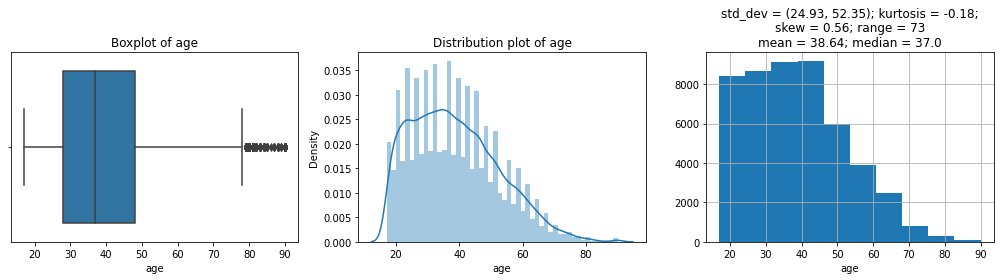

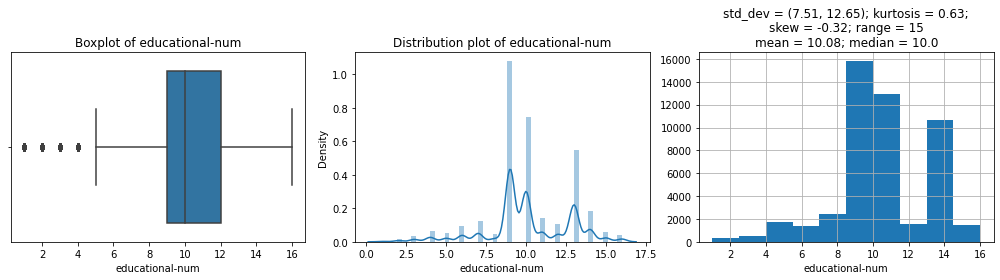

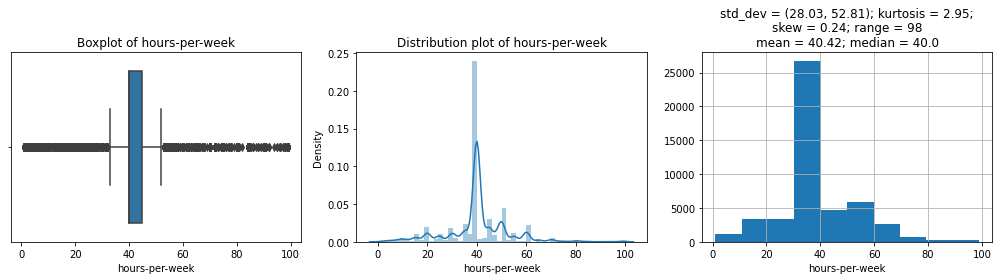

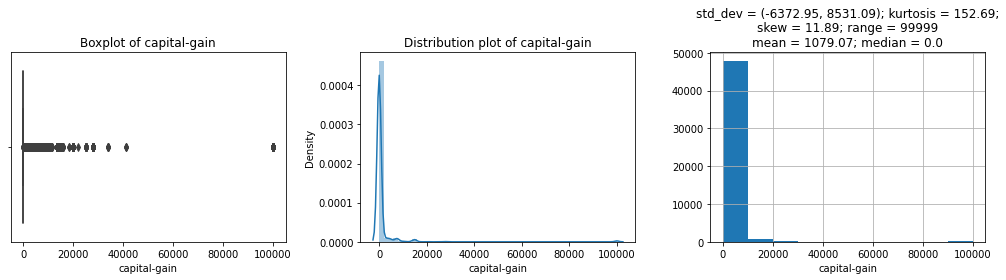

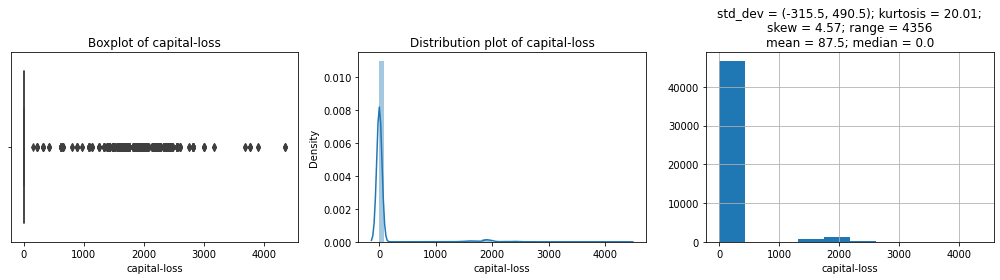

In [31]:
num = ['age','educational-num','hours-per-week','capital-gain','capital-loss']

def box_dist_hist(col):
        
        minn = round(df[col].min(), 2)
        maxx = round(df[col].max(), 2)
        rang = maxx - minn
        mean = round(df[col].mean(), 2)
        median = round(df[col].median(), 2)
        std = round(df[col].std(), 2)
        skew = round(df[col].skew(), 2)
        kurt = round(df[col].kurtosis(), 2)

        # Points of Standard Deviation
        std_pts = mean-std , mean+std
                                                                                                                                                                                                                      
        fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(14, 4))
        sns.boxplot(x=df[col], ax=ax1)
        ax1.set_title('Boxplot of {}'.format(df[col].name))
        sns.distplot(df[col], ax=ax2)
        ax2.set_title('Distribution plot of {}'.format(df[col].name))
        df[col].hist(ax=ax3)
        ax3.set_xlabel(df[col].name)
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(std_pts[0],2),round(std_pts[1],2)), kurt, skew, rang, mean, median), loc='center')
    
        fig.tight_layout()
        
        
for i in num:
    box_dist_hist(i)

We can observe from the 3 types of plots of Numerical columns or features --- 

All the <b>statistical description</b> are also calculated.
#### Age :
Between 18 to 80 (somehow), people of average ages are lying. More people are lying after 80 also. So we can conclude that the ages after 80 are the outliers here.<br>
In this case, the Distribution is also Right-Skewed (Positively Skewed) Normal Distribution
#### Educational-num :
We can easily see the outliers in the boxplot. Also this is not Normally Distributed. In the histogram, it's showing the frequency of each interval.
#### Capital-gain & Capital-loss :
We see that a large number of outliers are there in both the two features, both are extremely Right-Skewed (positively skewed) and same in the histogram also. <br>
Later we will handle the outliers.
#### Hours-per-week :
There is also a huge number of outliers are present. Also can see that Most of the people work 30-40 hours-per-week.

### Countplot of Categorical data

In [32]:
# Categorical datatypes

df.select_dtypes(exclude=['int64','float64']).dtypes

workclass         object
marital-status    object
occupation        object
race              object
gender            object
native-country    object
income            object
dtype: object

Workclass :
 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Occupation :
 Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64


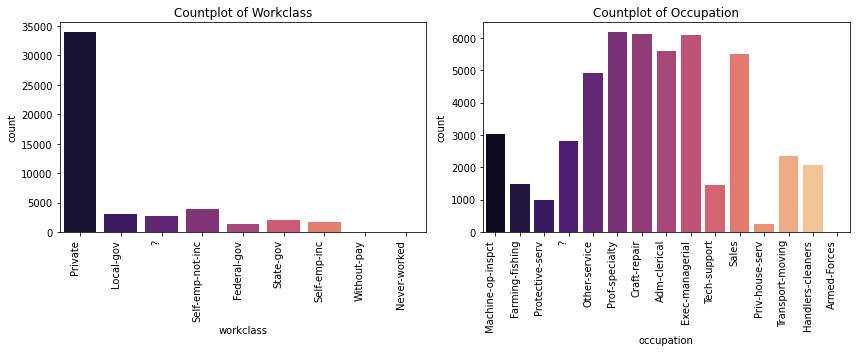

In [33]:
print('Workclass :\n',df['workclass'].value_counts())
print('\nOccupation :\n',df['occupation'].value_counts())

fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(df['workclass'], palette='magma', ax=ax[0])
ax[0].set_title('Countplot of Workclass')
sns.countplot(x=df['occupation'], palette='magma', ax=ax[1])
ax[1].set_title('Countplot of Occupation')

fig.autofmt_xdate(rotation= 90)
fig.tight_layout()

In <b>Workclass</b>, we can see, Most of the people (around 34000) are working in <b>Private Sectors</b>, and  <b>'without-pay'</b> and <b>'never-worked'</b> workclass has min count<br>
In <b>Occupation</b>, Prof-specialty has the maximum in count and Armed-Forces has minimum.<br>
There <b>"?"</b> indicating the missing values.

### Count Distribution of Gender, Income, Race columns in Pie plot 

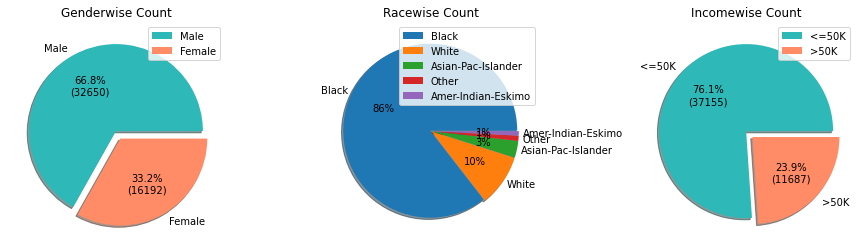

In [34]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(16,4))

ax1.pie(df['gender'].value_counts(),labels=df['gender'].unique(), autopct=lambda pct: func(pct, df['gender'].value_counts()), explode=[0.0,0.1], shadow=True, colors=['#2eb8b8','#ff8c66'])
ax1.set_title('Genderwise Count')
ax1.legend(labels=df['gender'].unique(), loc='best')

ax2.pie(df['race'].value_counts(),labels=df['race'].unique(), autopct='%.0f%%', shadow=True,labeldistance=1.05,explode=[0.01]*5)
ax2.set_title('Racewise Count')
ax2.legend(labels=df['race'].unique())

ax3.pie(df['income'].value_counts(),labels=df['income'].unique(), autopct=lambda pct: func(pct, df['income'].value_counts()), explode=[0.0,0.1], shadow=True, colors=['#2eb8b8','#ff8c66'])
ax3.set_title('Incomewise Count')
ax3.legend(labels=df['income'].unique(), loc='best')

In each Pie chart, <b>Count or Ratio or Percentage of each unique value </b> is calculated.

## Bivariate Analysis

<ol>
    <li>We perform Bi-variate analysis with 2 variables for any combination of Categorical and Continuous variables.</li>
    <li>The combination can be, Categorical & Categorical, Categorical & Continuous and Continuous & Continuous</li>

### Correlation

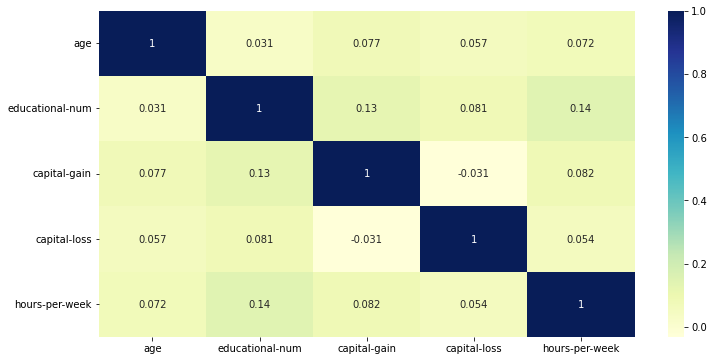

In [35]:
plt.figure(figsize=(12, 6))

corr = df.corr()
sns.heatmap(corr, 
            annot = True,
            cmap = 'YlGnBu');

Above, <b>Dark shades represent positive correlation or highly correlated</b> to each other and the <b>lighter shades represent negative correlation.</b><br>
From above we can see, there is a <b>strong negative correlation between "capital-gain" and "capital-loss".</b>

### Pairplot among Numerical features, based on Income

<Figure size 1296x1296 with 0 Axes>

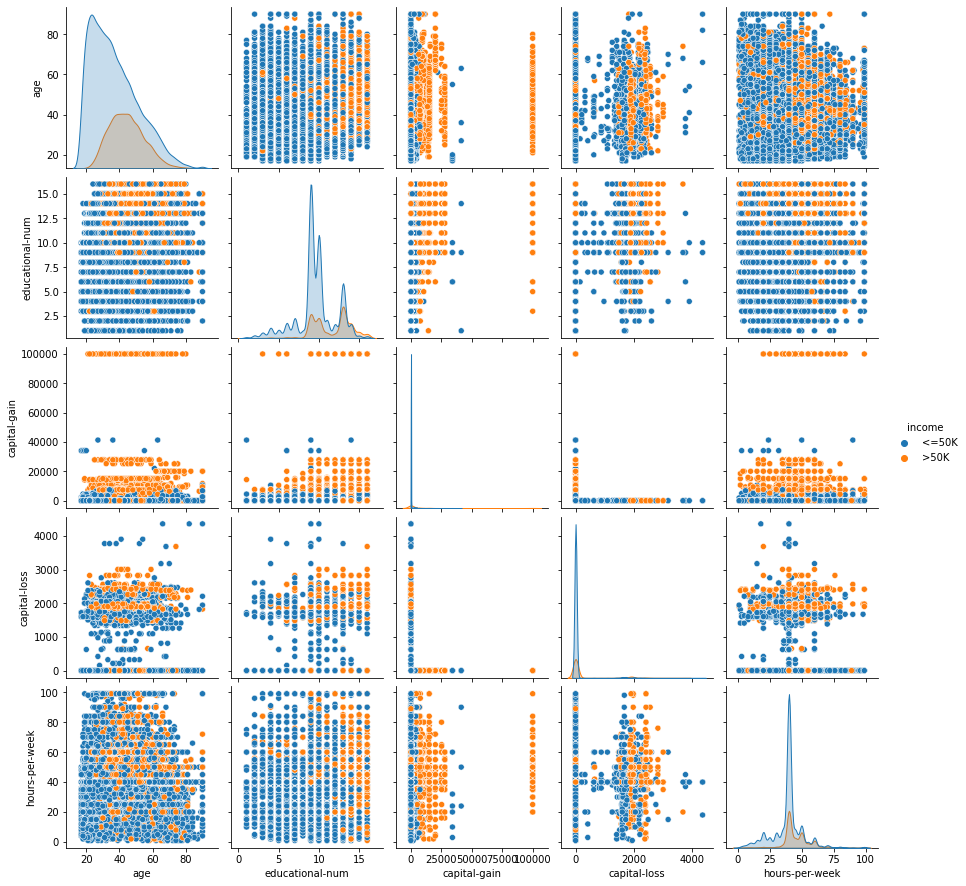

In [36]:
plt.figure(figsize=(18, 18))

sns.pairplot(df, diag_kind='kde', hue='income')

From all the graphs among each other, it's showing that percentage of people whose income <b>"<=50K" is greater than the people whose income is ">50K" at every aspect</b>, except few features.

### Joint plots among Numerical features

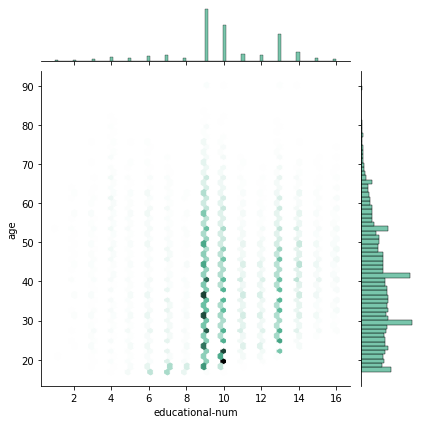

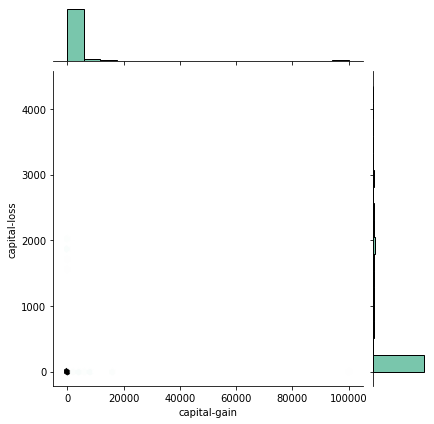

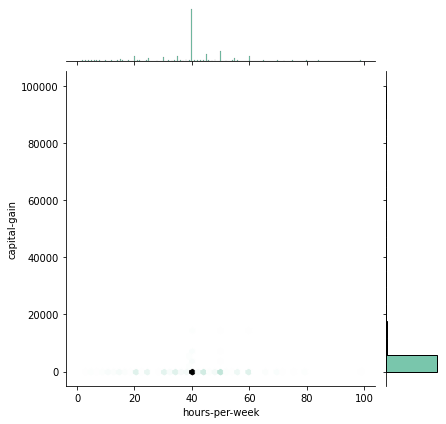

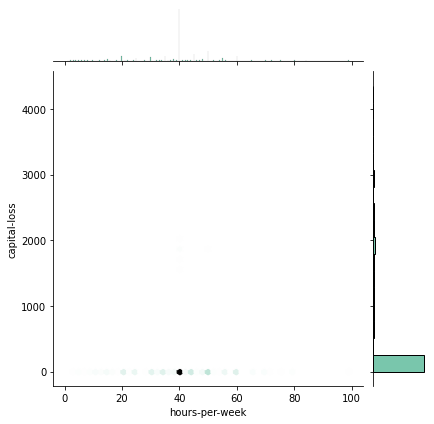

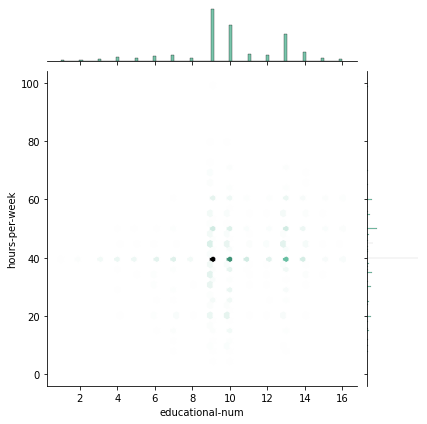

In [37]:
def joint_analysis(col_x, col_y):
    sns.jointplot(df[col_x], df[col_y], kind="hex", color="#4CB391")
    
joint_analysis('educational-num', 'age')
joint_analysis('capital-gain','capital-loss')
joint_analysis('hours-per-week', 'capital-gain')
joint_analysis('hours-per-week', 'capital-loss')
joint_analysis('educational-num', 'hours-per-week')

<b>Age Vs Educational-num : </b> Total education level of 8 to 10 are the people whose Age is between 30 to 40 <br>
<b>Capital-gain Vs Capital-loss : </b> The highest no of people's capital-gain is 0, capital-loss is also 0 <br>
<b>Hours-per-week Vs Capital : </b> Who work 40 hours per week, has capital-gain = 0 and also capital-loss = 0<br>
<b>Educational-num Vs Hours-per-week: </b> Total education level of 8 to 10 are the people who work 40 hours per week

### Boxplot and Barplot b/w Numerical column and Target column(Income) 

<=50K    37155
>50K     11687
Name: income, dtype: int64


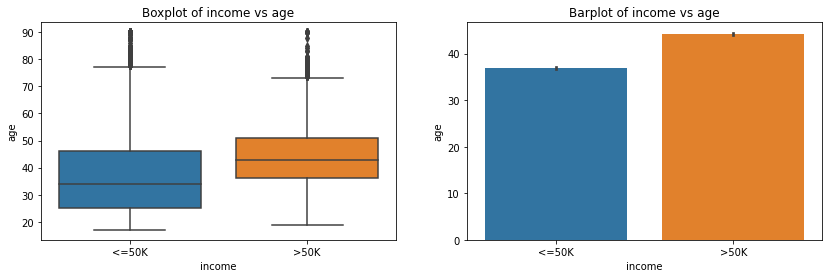

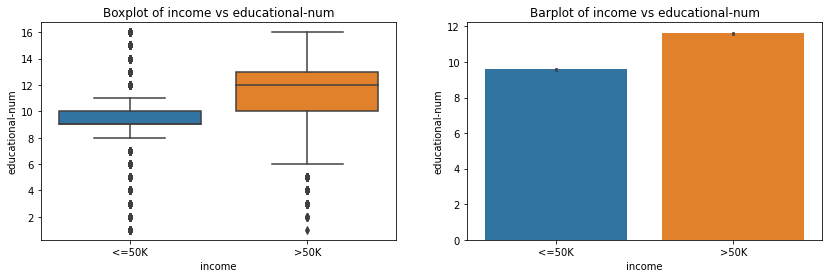

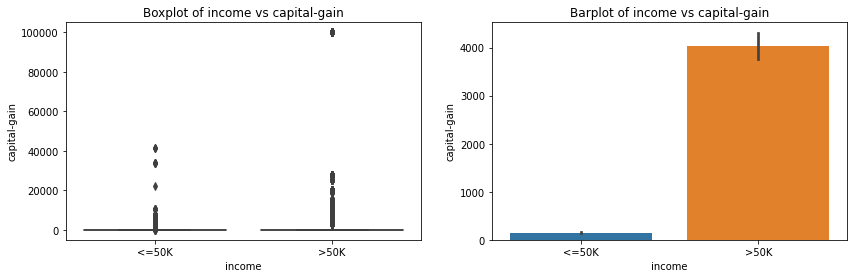

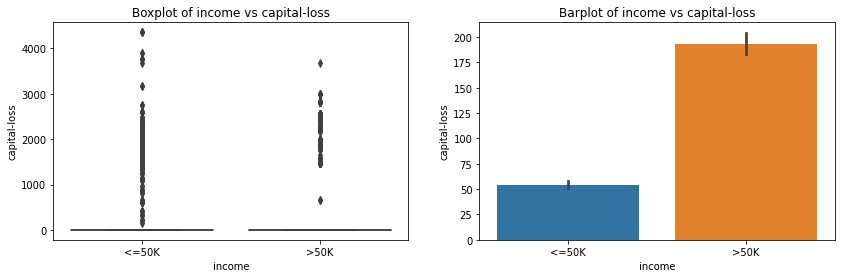

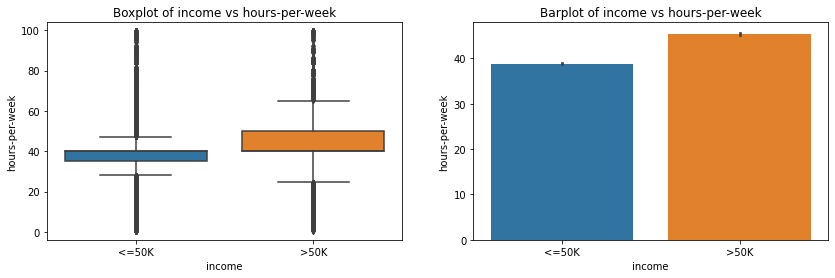

In [38]:
print(df['income'].value_counts())
def box_bar(col_x, col_y):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14, 4))
    sns.boxplot(x=df[col_x], y=df[col_y], ax=ax1).set_title('Boxplot of {} vs {}'.format(df[col_x].name, df[col_y].name))
    sns.barplot(x=df[col_x], y=df[col_y], ax=ax2).set_title('Barplot of {} vs {}'.format(df[col_x].name, df[col_y].name))
#     sns.swarmplot(x=df[col_x], y=df[col_y], ax=ax2).set_title('Swarm of {} vs {}'.format(df[col_x].name, df[col_y].name))

box_bar('income', 'age')
box_bar('income', 'educational-num')
box_bar('income', 'capital-gain')
box_bar('income', 'capital-loss')
box_bar('income', 'hours-per-week')


### Catplot or Countplot of Gender column, based on Income

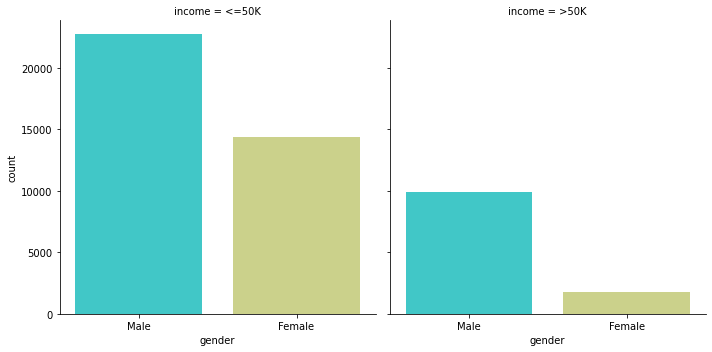

In [39]:
sns.catplot(x='gender', col='income', data=df, kind='count', palette='rainbow')

In the 1st part of the plot, we can see, % of Male whose income is '<=50K', is greater than the percentage of female . And in the 2nd part, % of Male whose income is '>50K' is greater than the % of Female.<br>
So we can say that there is no strong relationship in between Gender and their Income. 

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64


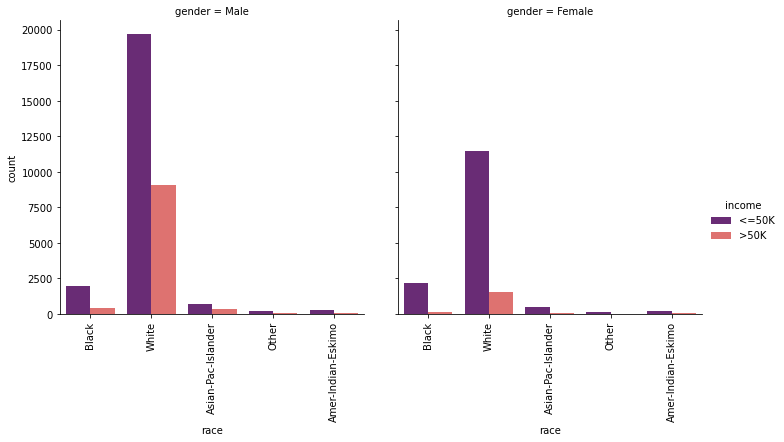

In [40]:
print(df['race'].value_counts())
chart = sns.catplot(x="race",col="gender", hue='income', kind='count', data=df, palette='magma')
chart.set_xticklabels(rotation=90)

It is clear that people with Gender male and race as white has the most people with income <=50k.

### Countplot of Workclass Vs Income

posx and posy should be finite values
posx and posy should be finite values


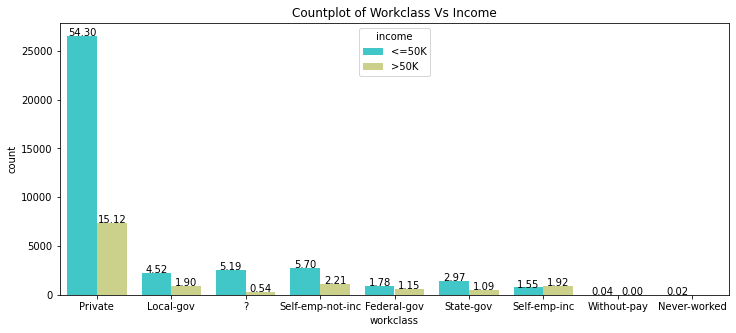

In [41]:
plt.figure(figsize=(12,5))

ax = sns.countplot(x="workclass", hue="income", data=df, palette = 'rainbow')
ax.set_title('Countplot of Workclass Vs Income')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/len(df['income']))*100),
            ha="center") 

The data seems to mainly consist <b>Private Employees,</b> Percentage(%) of Income is given on top of the each bar.
<br>
In All the workclasses % of people <b>Earning less than 50k</b> are more than those earning greater than 50k.

### Countplot of Occupation Vs Income

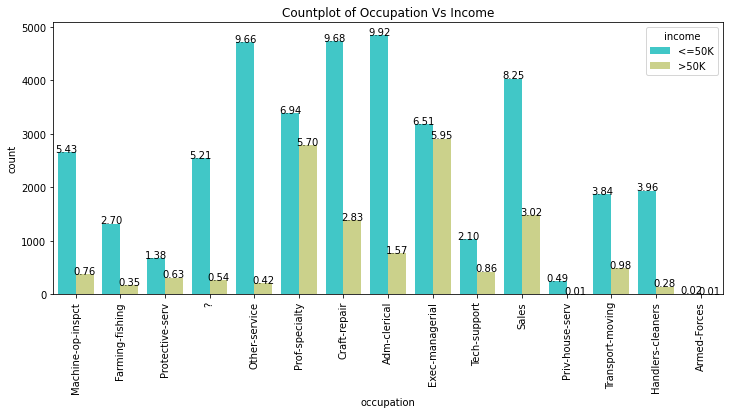

In [42]:
plt.figure(figsize=(12,5))

ax = sns.countplot(x="occupation", hue="income", data=df, palette = 'rainbow')
ax.set_title('Countplot of Occupation Vs Income')
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/len(df['income']))*100),
            ha="center") 

People, having <b>"Adm-clerical"</b> as their occupation has the <b>highest % of earning "<=50K" </b>and <br>
having <b>"Exec-managerial"</b> as their occupation has the <b>highest % of earning ">50K".</b><br>
There are <b>lowest count of "Armed-Forces"</b> are present, most of them are <b>earning "<=50" </b>

### Catplot , relationship b/w Gender and Marital-status upon their Income

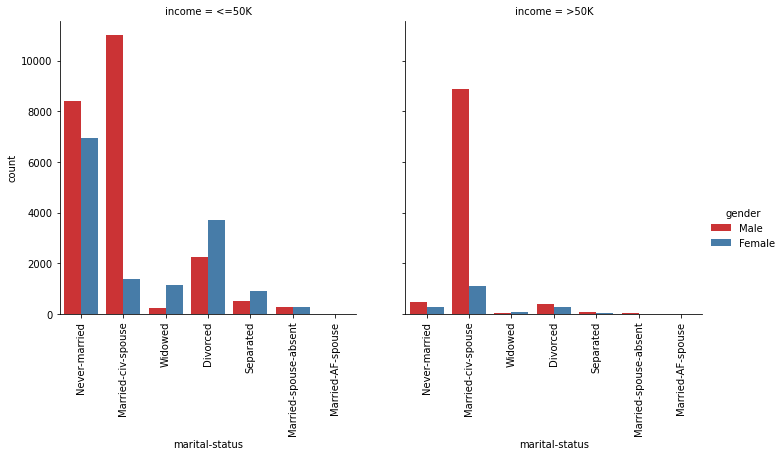

In [43]:
chart = sns.catplot(x='marital-status',hue='gender',col='income',data=df,kind='count', palette='Set1')
chart.set_xticklabels(rotation=90)

The people with marital status as <b>Married-civ-spouse</b> has highest people with <b>income more than 50K.</b>

## Outlier Analysis

To Find out Outliers, here we will use <b><u>IQR Method</u> .</b><br>
<br>
In this method by using <b>Inter Quartile Range(IQR), we detect outliers.</b> IQR tells us the variation in the data set.<br>
We know, Q3 & Q1 and IQR= Q3-Q1 , where Q1 = 1st quartile/25th percentile of the data & Q3 = 3rd quartile/75th percentile of the data <br>
Any value or data point, which is less than (Q1–1.5IQR) or greater than (Q3+1.5IQR), treated as outliers.

In [44]:
def find_outliers(col):
    outliers = []
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    
    IQR = Q3 - Q1

    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    
    print('\nQ1:',Q1,', Q3:',Q3,', IQR:',IQR,', Lower_extreme:',lower_limit,', Upper_extreme:', upper_limit)
    
    for i in df[col]:
        if (i > upper_limit) or (i < lower_limit):
            outliers.append(i)
            
    return outliers

<b>Number of Outliers</b>

In [45]:
for i in df.columns:
    if df[i].dtypes == 'int64':
        print(i, ':', len(find_outliers(i)))


Q1: 28.0 , Q3: 48.0 , IQR: 20.0 , Lower_extreme: -2.0 , Upper_extreme: 78.0
age : 216

Q1: 9.0 , Q3: 12.0 , IQR: 3.0 , Lower_extreme: 4.5 , Upper_extreme: 16.5
educational-num : 1794

Q1: 0.0 , Q3: 0.0 , IQR: 0.0 , Lower_extreme: 0.0 , Upper_extreme: 0.0
capital-gain : 4035

Q1: 0.0 , Q3: 0.0 , IQR: 0.0 , Lower_extreme: 0.0 , Upper_extreme: 0.0
capital-loss : 2282

Q1: 40.0 , Q3: 45.0 , IQR: 5.0 , Lower_extreme: 32.5 , Upper_extreme: 52.5
hours-per-week : 13496


#### We have also seen these in the above Boxplots.

### Transforming Values
Transforming variables can eliminate the outliers. These transformed values reduces the variation, caused by extreme values.<br>
A few techniques are there, 
<ol><b>
    <li>Scalling</li>
    <li>Log Transformation</li>
    <li>Cube Root Normalization</li>
    <li>Box-Cox Transformation</li>
    <li>Imputation</li></b>
</ol>
<ul>
    <li>These techniques convert values in the dataset to smaller values.</li>
    <li>There is no loss of data from these methods.</li>
    <li>In all these method boxcox transformation gives the best result.</li>
</ul>

<h4 style='color:#669900'>Box-Cox Transformation</h4>

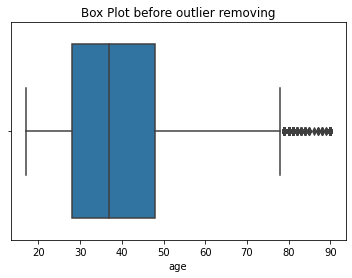

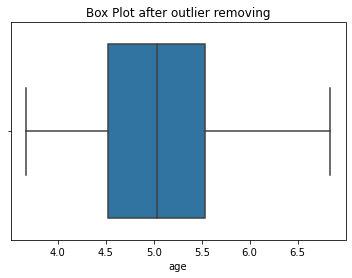

In [46]:
# Box-Cox Transformation of Age column

sns.boxplot(df['age'])
plt.title("Box Plot before outlier removing")
plt.show()

data = df['age'].values
df['age'], fitted_lambda= scipy.stats.boxcox(data[data > 0])
sns.boxplot(df['age'])
plt.title("Box Plot after outlier removing")
plt.show()

It's clearly showing, after applying the Box-Cox transformation <b>all the outliers in the attribute "age" are removed, without losing any data.</b>

<h4 style='color:#669900'>Median Imputation </h4>

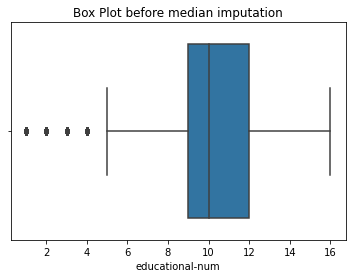

Median of educational-num : 10.0


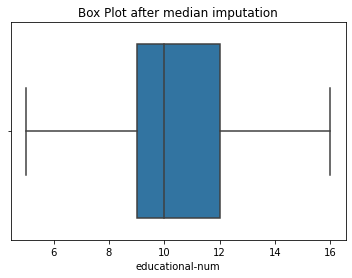

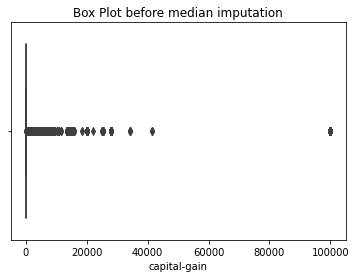

Median of capital-gain : 0.0


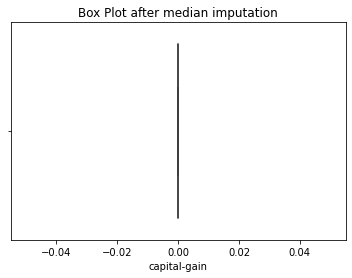

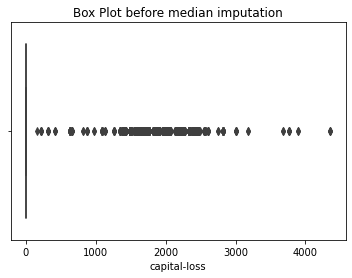

Median of capital-loss : 0.0


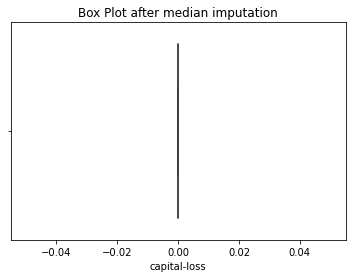

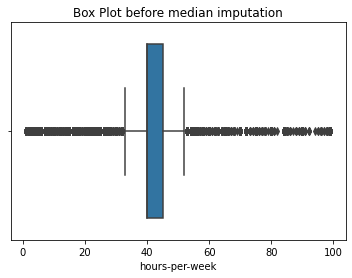

Median of hours-per-week : 40.0


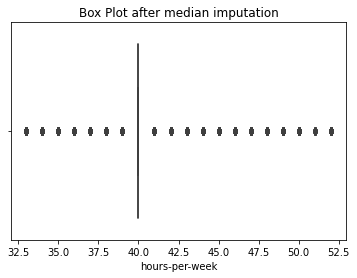

In [47]:
def imputation(col):
    sns.boxplot(df[col])
    plt.title("Box Plot before median imputation")
    plt.show()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(df[col])
    print('Median of {} : {}'.format(col, round(med,2)))
    for i in df[col]:
        if i > Upper_tail or i < Lower_tail:
                df[col] = df[col].replace(i, med)
    sns.boxplot(df[col])
    plt.title("Box Plot after median imputation")
    plt.show()          
    
imputation('educational-num')
imputation('capital-gain')
imputation('capital-loss')
imputation('hours-per-week')

By applying Median Imputaion, we are <b>able to remove outliers from "educational-num", "capital-gain", "capital-loss"</b> columns, but <b>could not remove from "hours-per-week"</b> column, we can just minimized the outliers a little bit.

In [48]:
# After applying Box-Cox transformation & Median Imputation, Number of OUtliers

print('Age :',len(find_outliers('age')))
print('Educational-num :',len(find_outliers('educational-num')))
print('Capital-gain :',len(find_outliers('capital-gain')))
print('Capital-loss :',len(find_outliers('capital-loss')))
print('hours-per-week :',len(find_outliers('hours-per-week')))


Q1: 4.5219078247091264 , Q3: 5.533817682456868 , IQR: 1.0119098577477414 , Lower_extreme: 3.0040430380875143 , Upper_extreme: 7.0516824690784805
Age : 0

Q1: 9.0 , Q3: 12.0 , IQR: 3.0 , Lower_extreme: 4.5 , Upper_extreme: 16.5
Educational-num : 0

Q1: 0.0 , Q3: 0.0 , IQR: 0.0 , Lower_extreme: 0.0 , Upper_extreme: 0.0
Capital-gain : 0

Q1: 0.0 , Q3: 0.0 , IQR: 0.0 , Lower_extreme: 0.0 , Upper_extreme: 0.0
Capital-loss : 0

Q1: 40.0 , Q3: 40.0 , IQR: 0.0 , Lower_extreme: 40.0 , Upper_extreme: 40.0
hours-per-week : 12543


### Treating Missing Values

In our datset, we can see from above, missing values are present in <b>("workclass","native-country","occupation")</b>, form of <b>"?".</b>

In [49]:
from numpy import nan

df = df.replace('?',nan)
df.head(10)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,4.321006,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,5.083503,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,4.521908,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,5.363942,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,0,0,40,United-States,>50K
4,3.760644,NaN,10,Never-married,NaN,White,Female,0,0,40,United-States,<=50K
5,4.875481,Private,6,Never-married,Other-service,White,Male,0,0,40,United-States,<=50K
6,4.584927,NaN,9,Never-married,NaN,Black,Male,0,0,40,United-States,<=50K
7,6.081687,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,White,Male,0,0,40,United-States,>50K
8,4.249609,Private,10,Never-married,Other-service,White,Female,0,0,40,United-States,<=50K
9,5.804831,Private,10,Married-civ-spouse,Craft-repair,White,Male,0,0,40,United-States,<=50K


In [50]:
df.isnull().sum()

age                   0
workclass          2799
educational-num       0
marital-status        0
occupation         2809
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [51]:
from scipy.stats import mode

df['workclass'].fillna(df['workclass'].mode()[0],inplace = True)
df['occupation'].fillna(df['occupation'].mode()[0],inplace = True)
df['native-country'].fillna(df['native-country'].mode()[0],inplace = True)

df.head(10)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,4.321006,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,5.083503,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,4.521908,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,5.363942,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,0,0,40,United-States,>50K
4,3.760644,Private,10,Never-married,Prof-specialty,White,Female,0,0,40,United-States,<=50K
5,4.875481,Private,6,Never-married,Other-service,White,Male,0,0,40,United-States,<=50K
6,4.584927,Private,9,Never-married,Prof-specialty,Black,Male,0,0,40,United-States,<=50K
7,6.081687,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,White,Male,0,0,40,United-States,>50K
8,4.249609,Private,10,Never-married,Other-service,White,Female,0,0,40,United-States,<=50K
9,5.804831,Private,10,Married-civ-spouse,Craft-repair,White,Male,0,0,40,United-States,<=50K


In [52]:
df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.0,48842.0,48842.000000
mean,5.016308,10.324106,0.0,0.0,41.131792
std,0.676152,2.198878,0.0,0.0,3.490418
min,3.666387,5.000000,0.0,0.0,33.000000
25%,4.521908,9.000000,0.0,0.0,40.000000
50%,5.033257,10.000000,0.0,0.0,40.000000
75%,5.533818,12.000000,0.0,0.0,40.000000
max,6.840918,16.000000,0.0,0.0,52.000000


### Importing Libraries to build ML Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [54]:
df['capital'] = df['capital-gain'] - df['capital-loss']
df.drop(['capital-gain', 'capital-loss'], inplace=True, axis=1)

In [55]:
df['income'] = df['income'].map({'<=50K': 'low', '>50K': 'high'})
df.loc[df['native-country'] != 'United-States', 'native-country'] = 'Others'
df.loc[df['race'] != 'White', 'race'] = 'Others'

print(df['income'].value_counts())
print(df['native-country'].value_counts())
print(df['race'].value_counts())

low     37155
high    11687
Name: income, dtype: int64
United-States    44689
Others            4153
Name: native-country, dtype: int64
White     41762
Others     7080
Name: race, dtype: int64


In [56]:
df.head()

,age,workclass,educational-num,marital-status,occupation,race,gender,hours-per-week,native-country,income,capital
0,4.321006,Private,7,Never-married,Machine-op-inspct,Others,Male,40,United-States,low,0
1,5.083503,Private,9,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,low,0
2,4.521908,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,40,United-States,high,0
3,5.363942,Private,10,Married-civ-spouse,Machine-op-inspct,Others,Male,40,United-States,high,0
4,3.760644,Private,10,Never-married,Prof-specialty,White,Female,40,United-States,low,0


In [ ]:
df_sklearn = df.copy()
column = ['age', 'educational-num', 'hours-per-week', 'capital']

df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]))

In [ ]:
df_sklearn.head()

#### Transform the features into Dummy variable

In [58]:
data = pd.get_dummies(df_sklearn,drop_first=True)

In [59]:
data.columns

Index(['age', 'educational-num', 'hours-per-week', 'capital',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'race_White', 'gender_Male',
       'native-country_United-States', 'income_low'],
      dtype='objec

In [60]:
data.describe()

,age,educational-num,hours-per-week,capital,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_White,gender_Male,native-country_United-States,income_low
count,48842.000000,48842.000000,48842.000000,48842.0,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,...,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,5.016308,10.324106,41.131792,0.0,0.064207,0.000205,0.751505,0.034704,0.079071,0.040559,...,0.004955,0.183879,0.020126,0.112690,0.029606,0.048217,0.855043,0.668482,0.914971,0.760718
std,0.676152,2.198878,3.490418,0.0,0.245124,0.014307,0.432145,0.183030,0.269853,0.197269,...,0.070216,0.387389,0.140433,0.316217,0.169499,0.214226,0.352061,0.470764,0.278928,0.426649
min,3.666387,5.000000,33.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.521908,9.000000,40.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,5.033257,10.000000,40.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,5.533818,12.000000,40.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,6.840918,16.000000,52.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Splitting the data into Input & Target variable

In [61]:
target = data['income_low']
inp = data.iloc[:,:34]

#### Splitting the Input data into Train & Test dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inp, target, test_size=0.3)

#### Create an instance of Decision Tree Classifier and fit the training dataset into it

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(x_train,y_train)

#### Predict with the Test data

In [ ]:
y_pred = model.predict(x_test)
y_pred

In [ ]:
cvs = cross_val_score(estimator=model, X=x_train, y=y_train,cv=10)
cvs.mean()*100

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

In [ ]:
y_pred = knn.predict(x_test)
y_pred

In [ ]:
knn.score(x_test,y_test)